### 3_Sprint_3T02
#### Source: 03 EXAMINING DATA" amb seaborn i utilitzant el dataset "movies".
#### Eloi Canals

- Exercici 2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

<div class="alert alert-block alert-info"><font size="5"><center><b><u>Statistical Foundations for Data Scientist</u></b></center></font>

\begin{align*}Alex\:Kumenius\end{align*}
\begin{align*}Business\hspace{2mm}Intelligence\hspace{2mm}and\hspace{2mm}Data\hspace{2mm}Scientist\hspace{2mm}Project\hspace{2mm}Integrator\end{align*}
$%$       
\begin{align*}Date : Gener\hspace{2mm}2021\end{align*}</div>

# <SPAN style=color:darkblue>RELATIONSHIPS BETWEEN VARIABLES</SPAN>

<span style=color:darkred><b><u>To answer research questions, data must be collected</u></b></span>. 

Analyses are motivated by <span style=color:blue><b><i>looking</i></b></span> for a <span style=color:blue><b><i>relationship between two or more variables</i></b></span>.

Examining <span style=color:blue><b>summary statistics</b></span> could provide insights for each of the research questions about the study.   

A <span style=color:blue><b>summary statistics</b></span> is a <b><i>single number summarizing a large amount of data</i></b>. In other words, a <span style=color:blue><b>summary statistics</b></span> is a <b>value</b> computed from the <b>data</b>.

# <span style=color:darkblue>EXAMINING NUMERICAL DATA</span>

We will be introduced to techniques for <span style=color:blue>exploring</span> and <span style=color:blue>summarizing numerical</span> variables, working with two datasets : '$email50$', '$county$' and '$cars$'.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## <span style=color:darkgreen>EXPLORING BIVARIATE VARIABLES WITH SCATTERPLOTS</span>

A <span style=color:blue>Scatterplot</span> provides a case-by-case view of data for <span style=color:blue>two <b>(bivariate)</b> numerical variables</span>. 

<span style=color:blue>Scatterplots</span> are helpful in quickly <span style=color:blue><b>spotting associations relating variables</b></span>, whether those associations come in the form of <b>simple trends</b> or whether those relationships are more <b>complex</b>.

We will use a <span style=color:blue>Scatterplot</span> to examine how $federal$ $spending$ and $poverty$ are related in the $county$ dataset.

In [2]:
# Open the choosen file

movies= pd.read_csv('movies.dat', sep='::', encoding='ISO-8859-1', warn_bad_lines = True, engine='python', names=["ID","Movie","Genre"])


movies[['Movie','Year']] = movies['Movie'].str.extract('(.*)\((\d{4})\)', expand=False)
movies['Year'] = pd.to_numeric(movies['Year'])
movies.head()

,ID,Movie,Genre,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [3]:
movies.shape

(3883, 4)

In [4]:
movies.columns

Index(['ID', 'Movie', 'Genre', 'Year'], dtype='object')

In [5]:
movies.Year.unique()


array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
       1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1963,
       1950, 1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952,
       1951, 1957, 1961, 1954, 1934, 1944, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
       1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
       1919, 2000, 1920, 1921])

In [6]:
movies.Genre.nunique()

301

In [7]:
movies.describe().round(3)

,ID,Year
count,3883.000,3883.000
mean,1986.049,1986.067
std,1146.778,16.896
min,1.000,1919.000
25%,982.500,1982.000
50%,2010.000,1994.000
75%,2980.500,1997.000
max,3952.000,2000.000


In [8]:
desglose_df = movies.Genre.str.get_dummies(sep='|')
desglose_df.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#movies.drop('Genre', inplace=True, axis=1)

movies = movies.join(desglose_df, how = 'left', lsuffix='left', rsuffix='right')
# movies = movies.merge(desglose_df) ERROR. Totes les pelis son Toy Story
movies.head()

,ID,Movie,Genre,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,Animation|Children's|Comedy,1995,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children's|Fantasy,1995,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama,1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
movies.Action.mean()

0.12953901622456862

In [11]:
decades = movies.groupby(['Year'], sort = True)
df = decades.sum()
df.head()

,ID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Year,,,,,,,,,,,,,,,,,,,
1919,8776,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
1920,6540,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1921,3310,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1922,4543,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1923,9011,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0


In [12]:
# filtrar decada els 80
decades.get_group(1980).head()

,ID,Movie,Genre,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
677,684,Windows,Drama,1980,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1112,1128,"Fog, The",Horror,1980,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1114,1130,"Howling, The",Horror,1980,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1119,1135,Private Benjamin,Comedy,1980,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1178,1196,Star Wars: Episode V - The Empire Strikes Back,Action|Adventure|Drama|Sci-Fi|War,1980,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [13]:
# Agrupar per any
Anys = df[df != 0].sum(axis=1).astype(np.int64)

#Anys_80 = movies[(movies.Year >= 1980 & movies.Year <= 1989)] ERRROR
Anys_80_Today = movies[movies.Year >= 1980]
Anys_80 = Anys_80_Today[Anys_80_Today.Year <= 1989]
Anys_80

,ID,Movie,Genre,Year,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
140,142,Shadows (Cienie),Drama,1988,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,541,Blade Runner,Film-Noir|Sci-Fi,1982,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
588,592,Batman,Action|Adventure|Crime|Drama,1989,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
606,610,Heavy Metal,Action|Adventure|Animation|Horror|Sci-Fi,1981,1,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
674,681,Clean Slate (Coup de Torchon),Crime,1981,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,3925,Stranger Than Paradise,Comedy,1984,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3867,3937,Runaway,Sci-Fi|Thriller,1984,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3868,3938,"Slumber Party Massacre, The",Horror,1982,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3869,3939,"Slumber Party Massacre II, The",Horror,1987,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
Generes = df[df != 0].sum(axis=0).astype(np.int64)
GeneresClean=Generes.drop(['ID'])
#Generes.drop('ID', inplace=True, axis=1)
GeneresClean

Action          503
Adventure       283
Animation       105
Children's      251
Comedy         1200
Crime           211
Documentary     127
Drama          1603
Fantasy          68
Film-Noir        44
Horror          343
Musical         114
Mystery         106
Romance         471
Sci-Fi          276
Thriller        492
War             143
Western          68
dtype: int64

In [15]:
decades_80 = Anys_80.groupby(['Year'], sort = True)
df_80 = decades_80.sum()
df_80.head()

Generes_80 = df_80[df_80 != 0].sum(axis=0).astype(np.int64)
Generes_80_Clean=Generes_80.drop(['ID'])
#Generes.drop('ID', inplace=True, axis=1)
Generes_80_Clean

Action         110
Adventure       78
Animation       14
Children's      31
Comedy         200
Crime           21
Documentary      9
Drama          211
Fantasy         24
Film-Noir        4
Horror         112
Musical         12
Mystery         12
Romance         54
Sci-Fi          66
Thriller        55
War             31
Western          3
dtype: int64

In [16]:
### Evolució de la producció cinematogràfica al dataset.

<AxesSubplot:ylabel='Density'>

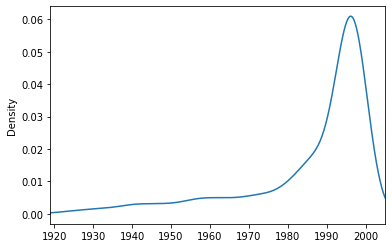

In [17]:
movies['Year'].plot(kind='kde', xlim=(1919,2005))

### Evolució de la producció cinematogràfica als anys 80.

<AxesSubplot:ylabel='Density'>

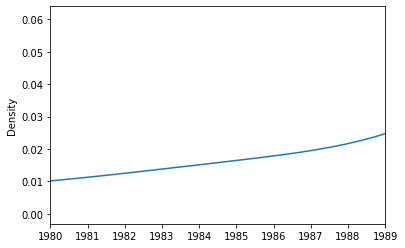

In [18]:
#movies[movies.Year == 1980]

movies['Year'].plot(kind='kde', xlim=(1980,1989))

### Generes del dataset

<AxesSubplot:>

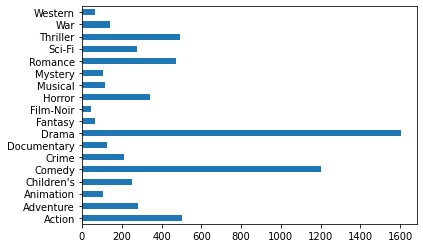

In [19]:
GeneresClean.plot(kind='barh')

<AxesSubplot:>

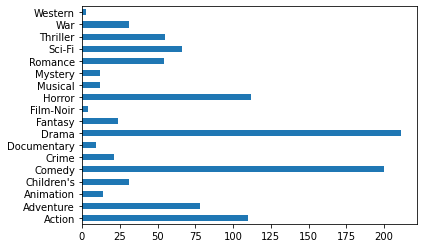

In [20]:
### Generes dels anys 80
Generes_80_Clean.plot(kind='barh')

   ### Comparant els generes de tot el dataset respecte el subgrup dels anys 80, es veu clarament una forta baixada de westerns, baixada moderada de Mistery, Film Noir.
### Les pujades importants son de Sci-Fi, Horror, Adventure, Action i comedy.

In [21]:
movies.columns

Index(['ID', 'Movie', 'Genre', 'Year', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [22]:
movies_mitjes = movies.groupby('Year').mean()

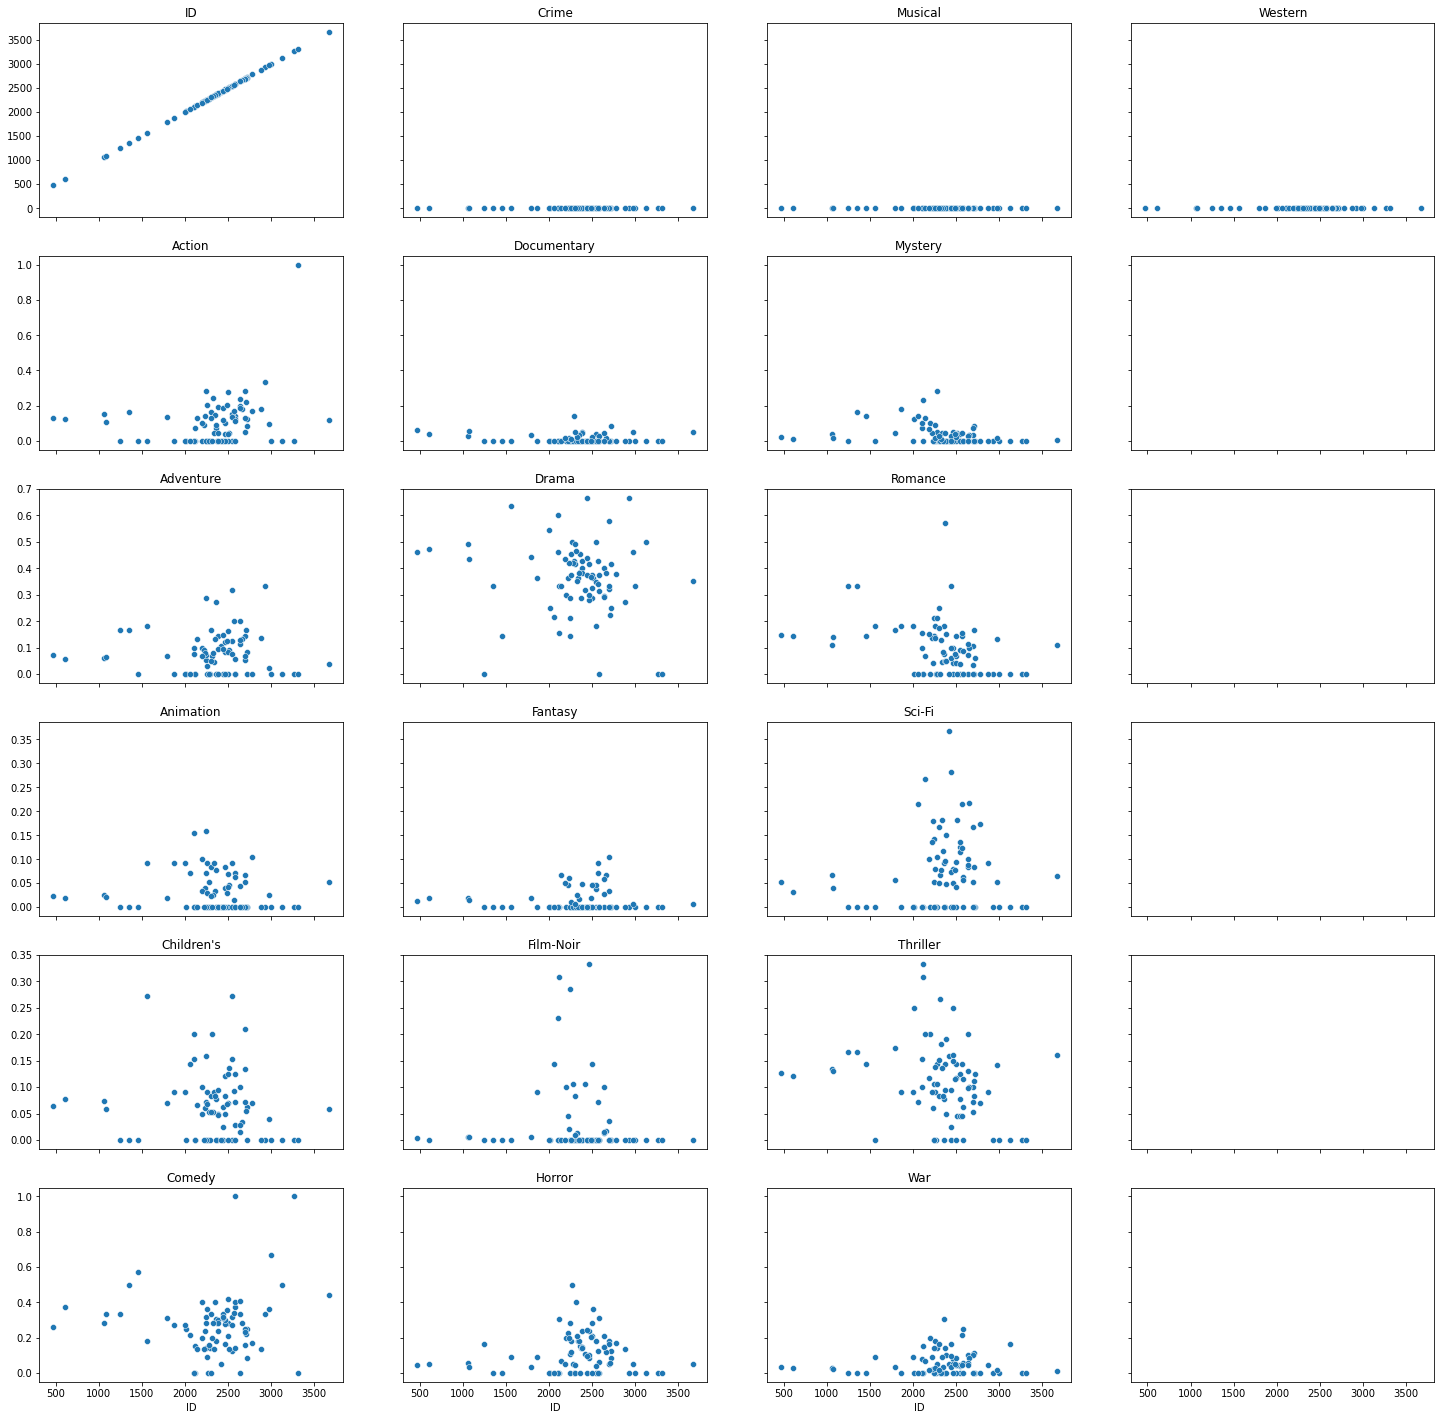

In [23]:
fig, ax = plt.subplots(6,4, sharex='col', sharey='row', figsize=(25,25))
x = y = 0
for Genere in movies_mitjes:
    sns.scatterplot(x=movies_mitjes.ID, y=Genere, data=movies_mitjes, ax=ax[x,y])
    ax[x,y].set_title(Genere)
    ax[x,y].yaxis.label.set_visible(False)
    if x < 5:
        x += 1
    else:
        x = 0
        y += 1

plt.show()

<AxesSubplot:>

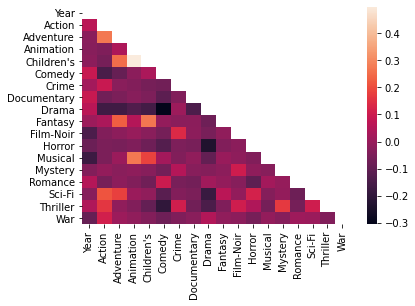

In [25]:
corr= movies.iloc[:, 3:-1].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, mask=matrix)